# Differential Radiometer File Processing

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Change these variables as needed

# Define the reference row, which is cold sky, and the sky row, which is actual galactic hydrogen signal
ref_row = 10
sky_row = 10

# Open data files 
#file_name = '../data/airspy/h120210602-0-spec.csv'
ref_file = '../data/rtl-sdr/spec_rtl1_20210621.csv'
sky_file = '../data/rtl-sdr/spec_rtl0_20210621.csv'

# Adjust view window
startcol_offset = 0
endcol_offset = 0

In [3]:
# Read entire dataset in a dataframe
df_sky = pd.read_csv(sky_file,header=None)
df_ref = pd.read_csv(ref_file,header=None)

In [4]:
# FFT number of bins, which is 6 less than the number of columns in the file
fft_num_bins = df_sky.shape[1] - 6

In [5]:
# This selects columns 6 thru last column -1 , which is all the FFT
# data. Not sure whay last column is invalid

# Now an offset is included
startcol = 9 + startcol_offset
endcol = -1 - endcol_offset

# The number of columns actually number of bins minus the start and end offsets
num_columns = fft_num_bins - startcol_offset - endcol_offset

# Create row series with the number of columns actually being plotted
sky_row_series = df_sky.iloc[sky_row,startcol:endcol]
ref_row_series = df_ref.iloc[ref_row,startcol:endcol]

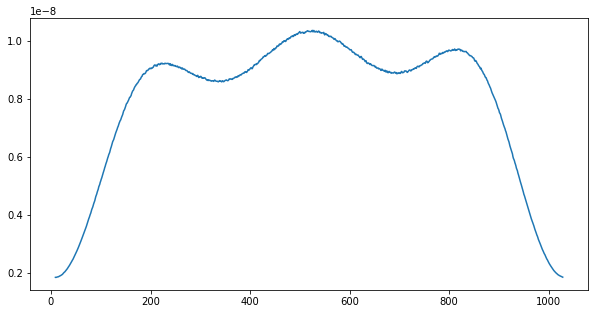

In [6]:
# Plot the row using the column range selected above
sky_row_series.plot(figsize=(10,5))

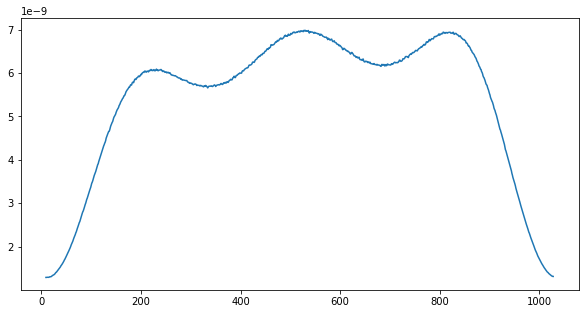

In [7]:
ref_row_series.plot(figsize=(10,5))

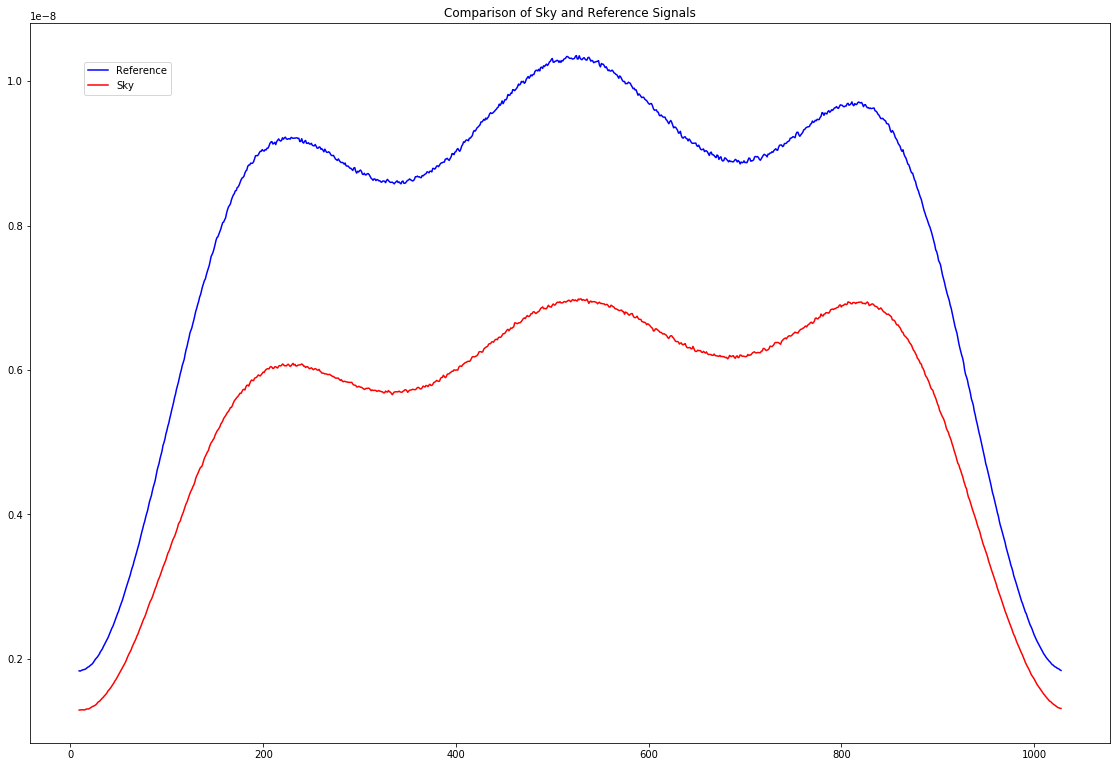

In [8]:
# Plot these together for comparison
fig = plt.figure(figsize=(15,10))

ax=fig.add_axes([0,0,1,1],title = "Comparison of Sky and Reference Signals")

ax.plot(sky_row_series,label='Reference', color='blue')
ax.plot(ref_row_series,label='Sky', color='red')

ax.legend(loc=(0.05,0.9)) # use a location code

In [9]:
# Lets see if the sky signal can be shifted up to match the ref signal
sky_row_series -= 0.3e-8

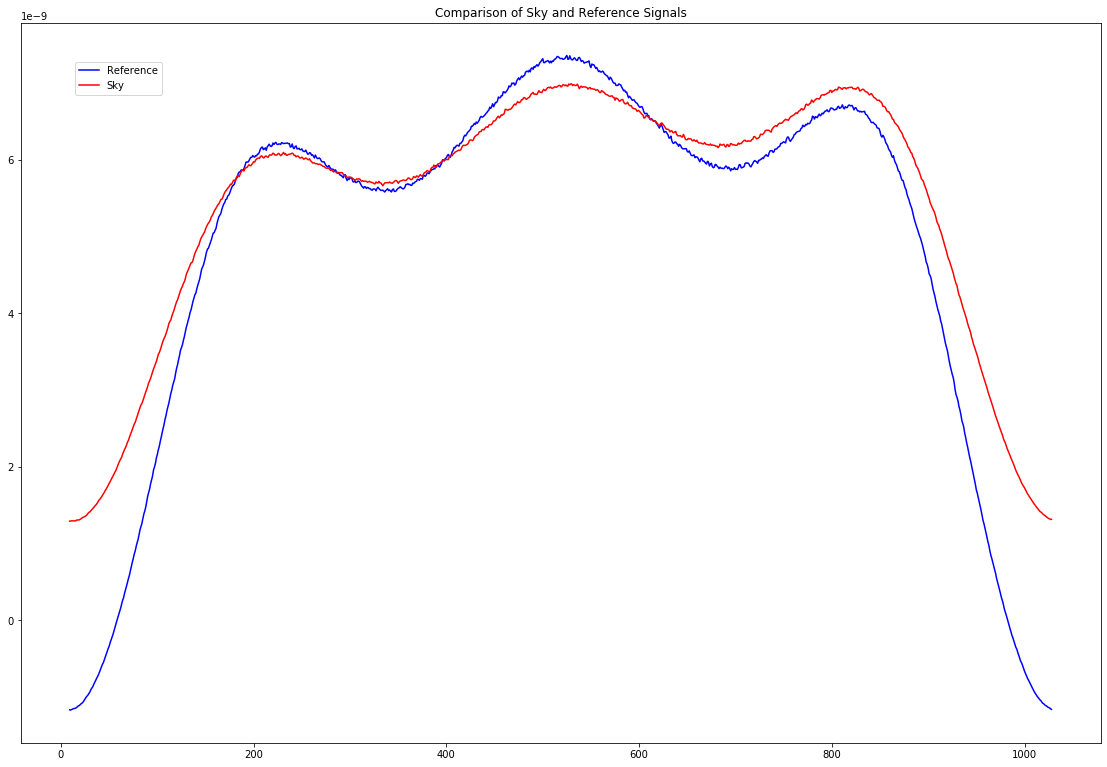

In [10]:
# Plot these together for comparison
fig = plt.figure(figsize=(15,10))

ax=fig.add_axes([0,0,1,1],title = "Comparison of Sky and Reference Signals")

ax.plot(sky_row_series,label='Reference', color='blue')
ax.plot(ref_row_series,label='Sky', color='red')

ax.legend(loc=(0.05,0.9)) # use a location code

In [11]:
# Subtract the reference signal from the sky signal
#result_row_series = sky_row_series - ref_row_series
# Try subtracting sky from ref
result_row_series = ref_row_series - sky_row_series

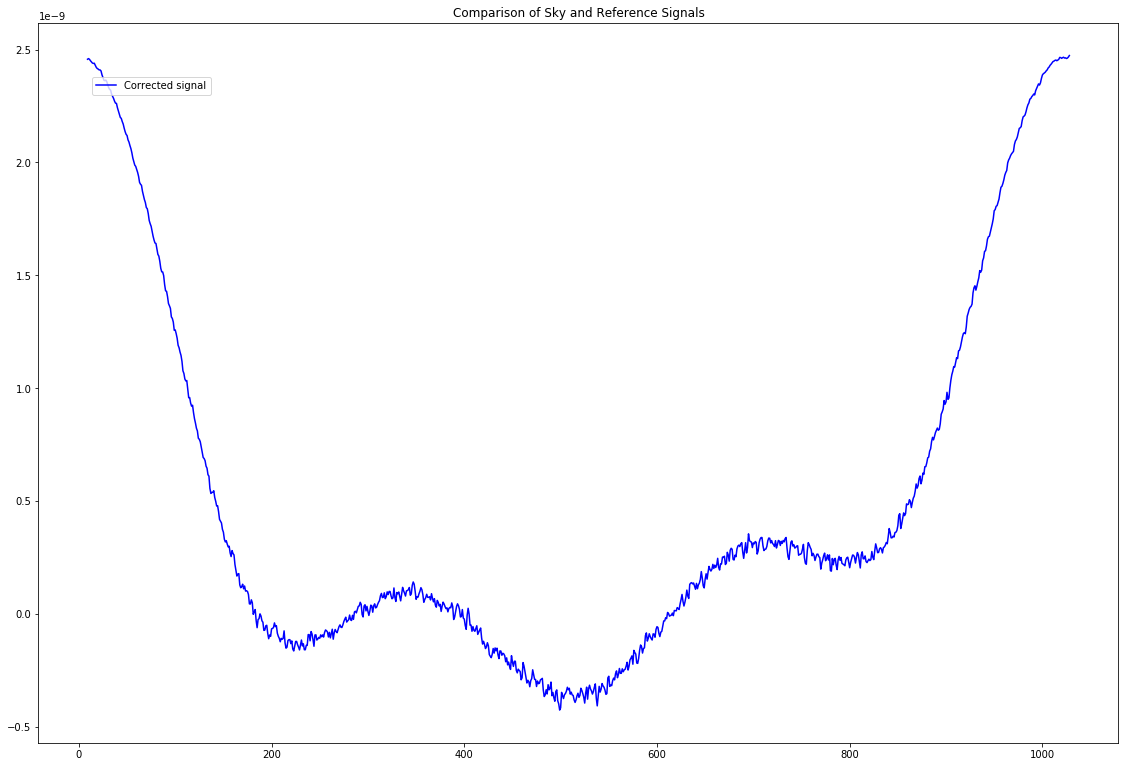

In [12]:
# Try to plot the baseline with the array
fig = plt.figure(figsize=(15,10))

ax=fig.add_axes([0,0,1,1],title = "Comparison of Sky and Reference Signals")
ax.plot(result_row_series,label='Corrected signal', color='blue')
ax.legend(loc=(0.05,0.9)) # use a location code